In [59]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(15, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

font1 = {'family':'serif','color':'#91ff35','size':20}
font2 = {'family':'serif','color':'#ff3d00s','size':15}


In [60]:
df = pd.read_csv('./data/bitcoin-price-17_9_14-8_12_22.csv')

### Remove unused attributes 
Xóa những cột không cần thiết, sử dụng **giá đóng cửa điều chỉnh** để thực hiện dự báo

In [61]:
df.drop(columns=['Open','High','Low','Close','Volume'],inplace=True)  
df.set_index(['Date'],inplace=True)

#### Chia 90% cho tập train và 10% cho tập test

In [62]:
train_df = df[:int(len(df)*0.9)].copy()
test_df = df[-(len(df) - len(train_df)):].copy()
# train_df.to_csv('./data/train_data.csv')
# test_df.to_csv('./data/test_data.csv')

### Xem xét đồ thị của dữ liệu giá bitcoin từ 17-4-2014 tới 8-12-2022

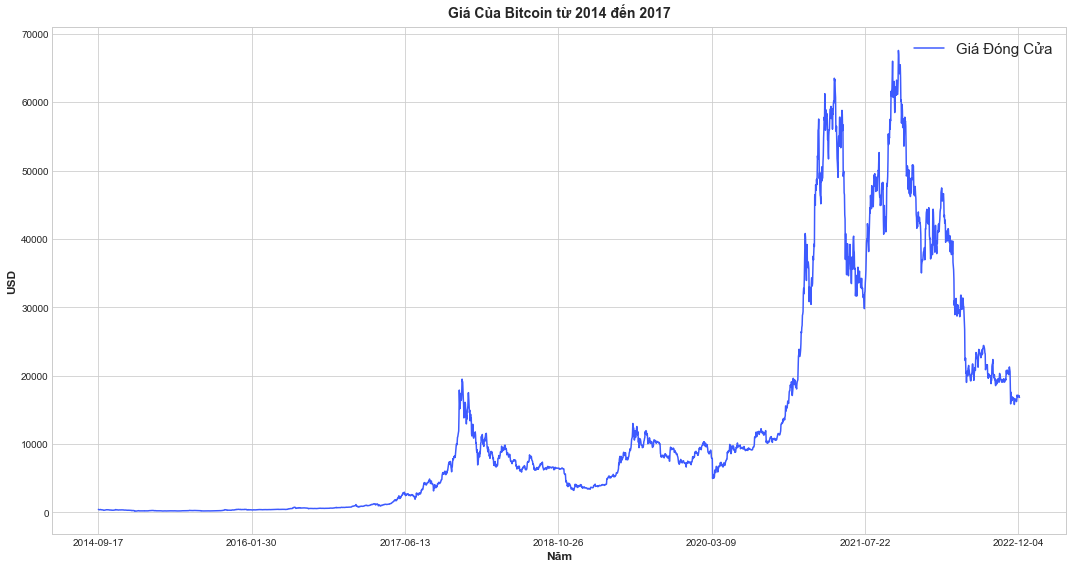

In [63]:
df.plot(color='#3d5afe')
plt.title("Giá Của Bitcoin từ 2014 đến 2017")
plt.xlabel("Năm")
plt.ylabel("USD")
plt.legend(['Giá Đóng Cửa'],fontsize=15)
plt.show()

### Kiểm tra tính dừng của chuỗi dữ liệu giá bitcoin
Bằng cách xem xét đồ thị ACF

Xem xét đồ thị ACF  
Các đỗ trễ tự tương quang rất lớn tất cả đều bằng 1 nên chuỗi chưa ổn định cho nên cần phải lấy sai phân để chuỗi có thể ổn định được.

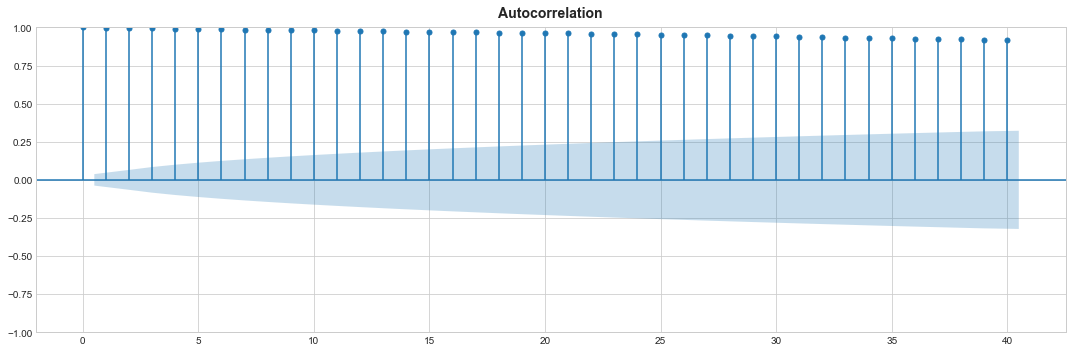

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
chart = plot_acf(train_df['Adj Close'],lags=40,ax=ax)

Lấy sai phân lần 1
và xem lại biểu đồ ACF

In [65]:
train_df['price_diff_1'] = train_df['Adj Close'].diff()
# xóa bỏ hàng null
train_df.dropna(inplace=True)

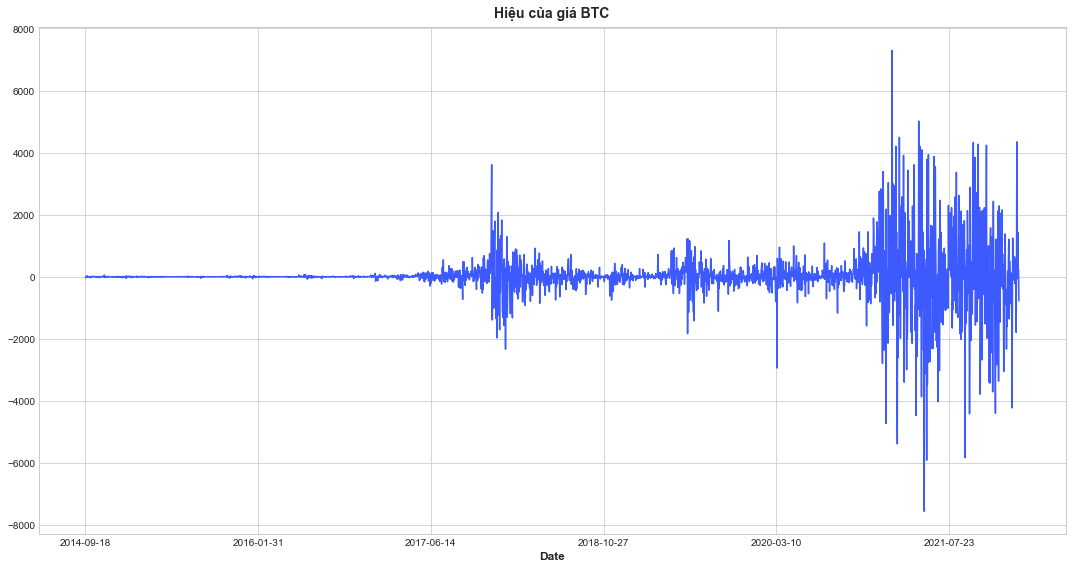

In [66]:
train_df['price_diff_1'].plot(color='#3d5afe')
cache=plt.title("Hiệu của giá BTC")

Dữ liệu chuỗi đã bắt đầu giao động quanh mức 0

Text(0.5, 1.0, 'ACF of difference level 1')

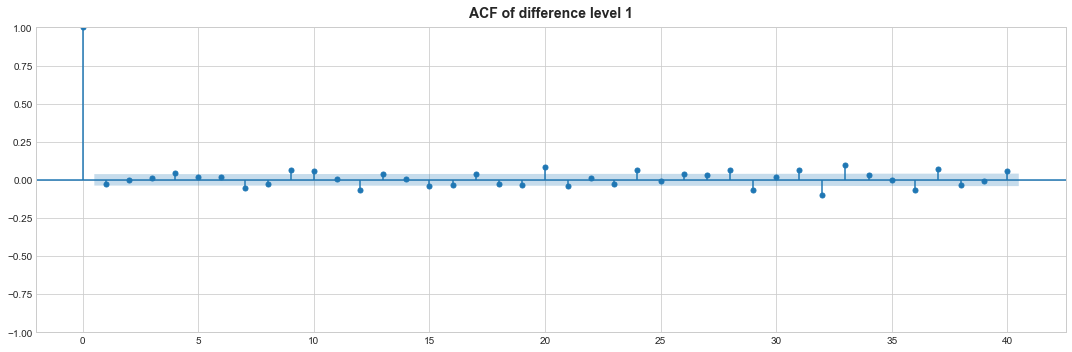

In [67]:
fig, ax = plt.subplots(figsize=(15, 5))
chart = plot_acf(train_df['price_diff_1'],lags=40,ax=ax)
plt.title("ACF of difference level 1")

Hệ số tượng quang đã có sự giảm mạnh (dies down) chuỗi có thể có khả năng dừng, để chắn chắn đây là độ sai khác
tốt nhất thì chúng ta sẽ lấy thêm một lần sai phân nữa để kiểm tra.

Text(0.5, 1.0, 'ACF of difference level 2')

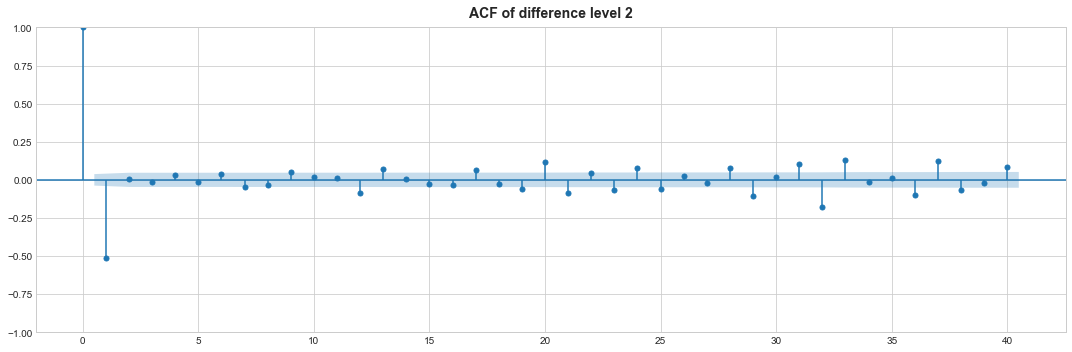

In [68]:

fig, ax = plt.subplots(figsize=(15, 5))
chart = plot_acf(train_df['price_diff_1'].diff().dropna(),lags=40,ax=ax)
plt.title("ACF of difference level 2")

ACF của sai khác bậc 2 , ta nhận thấy hệ số tự tương của của độ trễ thứ nhất từ dương chuyển sang âm cho nên , dữ liệu đã bị 
overdifference quá mức cho nên hệ số sai phân (difference) băng 1 là hợp lí cho chuỗi dữ liệu dừng.

##### Kết luận hệ số sai phân (difference) 1 là tốt nhất để ổn định chuỗi dữ liệu trước khi ta thực hiện xây dựng mô hình ARIMA với tham số **d=1**
Cách xác định được lấy từ nguồn tham khảo [Identifying the order of differencing in an ARIMA model](https://people.duke.edu/~rnau/411arim2.htm)